In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
#from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
master = pd.read_excel('master.xlsx')
test = pd.read_excel('test.xlsx')

In [2]:
master.drop(labels=['test_id', 'Ts_Name','Ts_TCD_Releases', 'Ts_Executing_OpCos','Cy_Terminal_SW_Version','Ts_TCD_Releases','date',
                     'Ts_Description(draft)','fail_count','pass_count','Cy_Executing_OpCo',
                     'pass_ratio','Rn_Tester_Name','Terminal'],axis=1,inplace=True)
test.drop(labels=['test_id', 'Ts_Name','Ts_TCD_Releases', 'Ts_Executing_OpCos','Cy_Terminal_SW_Version','Ts_TCD_Releases','date',
                     'Ts_Description(draft)','fail_count','pass_count','Cy_Executing_OpCo',
                     'pass_ratio','Rn_Tester_Name','Terminal'],axis=1,inplace=True)

In [3]:
master.loc[len(master)] = ['missing',0,0,0,0,0,0,0,'missing','2 - Serious','missing',0,'No Run',0,0,0,0,0,0,0,0,
               0,'missing','missing','MR0']


In [4]:
master['defect_from_RN'].fillna(0,inplace=True)
test['defect_from_RN'].fillna(0,inplace=True)

master['Cy_Terminal_Name'].fillna('missing',inplace=True)
master['Cy_Terminal_Release'].fillna('missing',inplace=True)
master['Scope_CTC'].fillna(0,inplace=True)
master['Ts_Suggested_Severity'].fillna('missing',inplace=True)
master['Rn_Status'].fillna('No Run',inplace=True)
master['fail_ratio'].fillna(0.053,inplace=True)
master['soft_ver_count'].fillna(0,inplace=True)
master['Scope_CTC'].replace({'X':1}, inplace=True)
master['Ts_Suggested_Severity'].replace({'4 - Minor':1, '3 - Major':2,'2 - Serious':3,'1b - Critical':4,'1a - Fatal':5,'missing':0}, inplace=True)
master['Rn_Status'].replace({'No Run':0, 'Passed':1, 'Design Limitation':2,'Blocked':3,'Failed':4}, inplace=True)
master['Defect_ID'].fillna(0,inplace=True)
master['Status'].fillna('No Defect',inplace=True)
master['Severity'].fillna('NA',inplace=True)
master['total_defect_count'].fillna(0,inplace=True)
master['open_defect_count'].fillna(0,inplace=True)

test['Cy_Terminal_Name'].fillna('missing',inplace=True)
test['Cy_Terminal_Release'].fillna('missing',inplace=True)
test['Scope_CTC'].fillna(0,inplace=True)
test['Ts_Suggested_Severity'].fillna('missing',inplace=True)
test['Rn_Status'].fillna('No Run',inplace=True)
test['fail_ratio'].fillna(0.053,inplace=True)
test['soft_ver_count'].fillna(0,inplace=True)
test['Scope_CTC'].replace({'X':1, 0:0}, inplace=True)
test['Ts_Suggested_Severity'].replace({'4 - Minor':1, '3 - Major':2,'2 - Serious':3,'1b - Critical':4,'1a - Fatal':5,'missing':0}, inplace=True)
test['Rn_Status'].replace({'No Run':0, 'Passed':1, 'Design Limitation':2,'Blocked':3,'Failed':4}, inplace=True)
test['Defect_ID'].fillna(0,inplace=True)
test['Status'].fillna('No Defect',inplace=True)
test['Severity'].fillna('NA',inplace=True)
test['total_defect_count'].fillna(0,inplace=True)
test['open_defect_count'].fillna(0,inplace=True)

In [5]:
#  scope handling
#master['Scope_CTC'].fillna('N',inplace=True)
master['Scope_CZ'].fillna(0,inplace=True)
master['Scope_DE'].fillna(0,inplace=True)
master['Scope_HU'].fillna(0,inplace=True)
master['Scope_IE'].fillna(0,inplace=True)
master['Scope_NL'].fillna(0,inplace=True)
master['Scope_UK'].fillna(0,inplace=True)

test['Scope_CZ'].fillna(0,inplace=True)
test['Scope_DE'].fillna(0,inplace=True)
test['Scope_HU'].fillna(0,inplace=True)
test['Scope_IE'].fillna(0,inplace=True)
test['Scope_NL'].fillna(0,inplace=True)
test['Scope_UK'].fillna(0,inplace=True)

master['Scope_CZ'].replace({'X':1, 0:0}, inplace=True)
master['Scope_DE'].replace({'X':1, 0:0}, inplace=True)
master['Scope_HU'].replace({'X':1, 0:0}, inplace=True)
master['Scope_IE'].replace({'X':1, 0:0}, inplace=True)
master['Scope_NL'].replace({'X':1, 0:0}, inplace=True)
master['Scope_UK'].replace({'X':1, 0:0}, inplace=True)

test['Scope_CZ'].replace({'X':1, 0:0}, inplace=True)
test['Scope_DE'].replace({'X':1, 0:0}, inplace=True)
test['Scope_HU'].replace({'X':1, 0:0}, inplace=True)
test['Scope_IE'].replace({'X':1, 0:0}, inplace=True)
test['Scope_NL'].replace({'X':1, 0:0}, inplace=True)
test['Scope_UK'].replace({'X':1, 0:0}, inplace=True)

In [6]:
master['Severity'].replace({'NA':0,'4 - Minor':1, '3 - Major':2,'2 - Serious':3,
                                        '1b - Critical':4,'1a - Fatal':5}, inplace=True)
master['Status'].replace({'No Defect':0, 'Closed':1, 'Design Limitation':2,'Duplicate':3,'Rejected':3,'Suspended':3,
                                        'Retest':4,'Reopen':5,'Open':5}, inplace=True)
test['Severity'].replace({'NA':0,'4 - Minor':1, '3 - Major':2,'2 - Serious':3,
                                        '1b - Critical':4,'1a - Fatal':5}, inplace=True)
test['Status'].replace({'No Defect':0, 'Closed':1, 'Design Limitation':2,'Duplicate':3,'Rejected':3,'Suspended':3,
                                        'Retest':4,'Reopen':5,'Open':5}, inplace=True)

In [7]:
# Traning Data
le = LabelEncoder()
master['Cy_Terminal_Name'] = le.fit_transform(master['Cy_Terminal_Name'])
test['Cy_Terminal_Name'] = le.transform(test['Cy_Terminal_Name'])
master['input_terminal'] = le.transform(master['input_terminal'])
test['input_terminal'] = le.transform(test['input_terminal'])

master['Cy_Terminal_Release'] = str(master['Cy_Terminal_Release'])
test['Cy_Terminal_Release'] = str(test['Cy_Terminal_Release'])
master['Cy_Terminal_Release'] = master['Cy_Terminal_Release'].apply(lambda x: 'Launch' if x.startswith('Laun') else 'MR0')
test['Cy_Terminal_Release'] = test['Cy_Terminal_Release'].apply(lambda x: 'Launch' if x.startswith('Laun') else 'MR0')
master['Cy_Terminal_Release'] = le.fit_transform(master['Cy_Terminal_Release'])
test['Cy_Terminal_Release'] = le.transform(test['Cy_Terminal_Release'])

master['input_release'] = le.fit_transform(master['input_release'])
test['input_release'] = le.transform(test['input_release'])


master['Ts_Test_Area'] = le.fit_transform(master['Ts_Test_Area'])
test['Ts_Test_Area'] = le.transform(test['Ts_Test_Area'])
master['area_from_RN'] = le.transform(master['area_from_RN'])
test['area_from_RN'] = le.transform(test['area_from_RN'])

master['Ts_Coverage'] = le.fit_transform(master['Ts_Coverage'])
test['Ts_Coverage'] = le.transform(test['Ts_Coverage'])

master['Defect_ID'] = le.fit_transform(master['Defect_ID'])
test['Defect_ID'] = le.transform(test['Defect_ID'])
master['defect_from_RN'] = le.transform(master['defect_from_RN'])
test['defect_from_RN'] = le.transform(test['defect_from_RN'])

In [8]:
master.shape
encoder = BinaryEncoder(cols=['Cy_Terminal_Name', 'Cy_Terminal_Release',
       'Ts_Test_Area', 'Ts_Coverage','input_terminal', 'input_release','defect_from_RN', 'area_from_RN'])  
master  = encoder.fit_transform(master)
master.shape

(22410, 25)

(22410, 47)

In [9]:
test.shape
test  = encoder.transform(test)
test.shape

(22409, 25)

(22409, 47)

In [10]:
master.isnull().any().any()

False

In [11]:
test.isnull().any().any()

False

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=master.is_selected,data=master, palette='hls')
plt.show()

In [13]:
master.is_selected.value_counts()

0    14048
1     8362
Name: is_selected, dtype: int64

In [14]:
y_train = master['is_selected']
x_train = master.drop(labels='is_selected',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=123)

In [18]:
# from imblearn.over_sampling import SMOTE

# os = SMOTE(random_state= 0,ratio = 1.0)
# #x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)
# #columns = x_train.columns

# x_train,y_train =os.fit_sample(x_train, y_train)
# x_train.shape
# # x_train = pd.DataFrame(data=bal_x_train,columns=columns )
# bal_y_train= pd.DataFrame(data=bal_y_train,columns=['y'])
# we can Check the numbers of our data
#print("length of oversampled data is ",len(bal_x_train))
#print("Number of no churn in oversampled data",len(bal_y_train[bal_y_train['y']==0]))
#print("Number of churn",len(bal_x_train[bal_y_train['y']==1]))
#print("Proportion of no churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==0])/len(bal_x_train))
#print("Proportion of churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==1])/len(bal_x_train))

(19776, 46)

In [15]:
Y_test = test['is_selected']
X_test = test.drop(labels='is_selected',axis=1)
X_test.shape
x_test.shape

(22409, 46)

(6723, 46)

In [16]:
clf = LogisticRegression().fit(x_train,y_train)
Y_pred_log = clf.predict(X_test)
y_pred_log = clf.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred_log)
f1_score(y_test, y_pred_log) 

0.9089692101740294

0.8787158145065399

In [18]:
accuracy_score(Y_test, Y_pred_log)
f1_score(Y_test, Y_pred_log) 

0.6332277210049534

0.6849388584352358

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

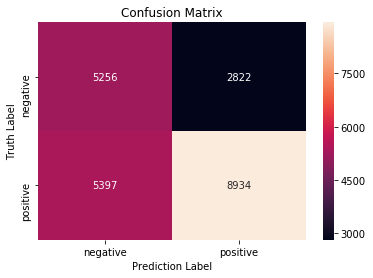

In [19]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(Y_test, Y_pred_log)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_log, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier()
randforest.fit(x_train,y_train)
Y_pred_RF = randforest.predict(X_test)
y_pred_RF = randforest.predict(x_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
accuracy_score(y_test, y_pred_RF)
f1_score(y_test, y_pred_RF) 

0.9974713669492786

0.9966725386572716

In [22]:
accuracy_score(Y_test, Y_pred_RF)
f1_score(Y_test, Y_pred_RF) 

0.7285019411843455

0.7316750463085472

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

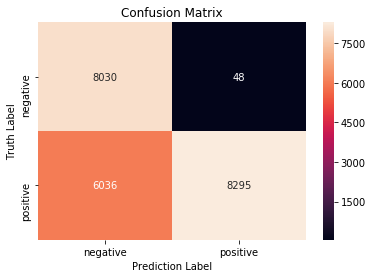

In [23]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Y_test, Y_pred_RF)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_RF, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [24]:
feature_importances = pd.DataFrame(randforest.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [25]:
feature_importances

,importance
Ts_Test_Area_4,2.085445e-01
soft_ver_count,9.785068e-02
Scope_IE,7.779284e-02
Scope_CZ,5.661798e-02
Ts_Test_Area_6,5.501375e-02
fail_ratio,4.121363e-02
Ts_Test_Area_5,3.816039e-02
Ts_Suggested_Severity,3.528662e-02
Scope_DE,3.437516e-02
Ts_Test_Area_2,3.074093e-02


In [26]:
from xgboost import XGBClassifier
XGClass = XGBClassifier()
XGClass.fit(x_train,y_train)
Y_pred_XG = XGClass.predict(X_test)
y_pred_XG = XGClass.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'

In [29]:
accuracy_score(y_test, y_pred_XG)
f1_score(y_test, y_pred_XG) 

0.9885467797114383

0.17204301075268816

In [30]:
accuracy_score(Y_test, Y_pred_XG)
f1_score(Y_test, Y_pred_XG) 

0.9895131420411442

0.17543859649122806

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Prediction Label')

Text(33.0, 0.5, 'Truth Label')

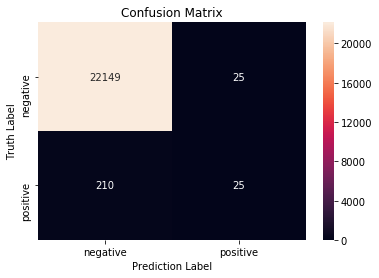

In [31]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_XG = confusion_matrix(Y_test, Y_pred_XG)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_XG, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [27]:
from sklearn import svm
clf = svm.SVC(kernel= 'rbf')
clf.fit(x_train,y_train)
Y_pred_sv = clf.predict(X_test)
y_pred_sv = clf.predict(x_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
accuracy_score(y_test, y_pred_sv)
f1_score(y_test, y_pred_sv) 

0.9775397887847687

0.9703631010794898

In [29]:
accuracy_score(Y_test, Y_pred_sv)
f1_score(Y_test, Y_pred_sv) 

0.7120799678700522

0.7141591352117669

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

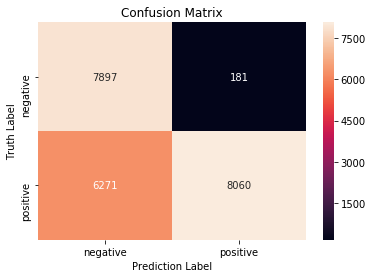

In [30]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(Y_test, Y_pred_sv)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_sv, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

## PCA

In [31]:
from sklearn.decomposition import PCA
pca_again = PCA(0.99)

In [32]:
xtrain_pca2 = pca_again.fit_transform(x_train,y_train)
xtrain_pca2.shape

(15687, 6)

In [33]:
Xtest_pca2 = pca_again.transform(X_test)
xtest_pca2 = pca_again.transform(x_test)
Xtest_pca2.shape

(22409, 6)

In [34]:
clf_pca = LogisticRegression().fit(xtrain_pca2,y_train)
Y_pred_log_pca = clf_pca.predict(Xtest_pca2)

In [35]:
accuracy_score(Y_test, Y_pred_log_pca)
f1_score(Y_test, Y_pred_log_pca)

0.6164041233432995

0.5926066350710899

In [36]:
randforest.fit(xtrain_pca2,y_train)
Y_pred_RF = randforest.predict(Xtest_pca2)
y_pred_RF = randforest.predict(xtest_pca2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
accuracy_score(y_test, y_pred_RF)
f1_score(y_test, y_pred_RF) 

0.9940502751747732

0.992156862745098

In [38]:
accuracy_score(Y_test, Y_pred_RF)
f1_score(Y_test, Y_pred_RF) 

0.7274755678522022

0.7304823690365858

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

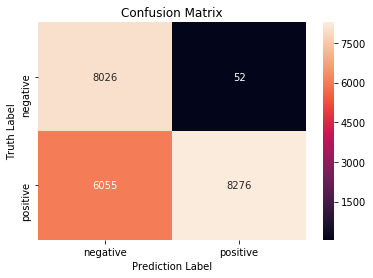

In [39]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Y_test, Y_pred_RF)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_RF, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [45]:
clf = XGBClassifier().fit(xtrain_pca2,y_train)
Y_pred_xg = clf.predict(Xtest_pca2)
accuracy_score(Y_test, Y_pred_xg)
f1_score(Y_test, Y_pred_xg) 

0.9895131420411442

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [ ]:
clf = svm.SVC(kernel= 'poly').fit(xtrain_pca2,y_train)
Y_pred_sv = clf.predict(Xtest_pca2)
accuracy_score(Y_test, Y_pred_sv)
f1_score(Y_test, Y_pred_sv) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier(max_depth=14, n_jobs=-1,n_estimators=4,random_state=123,max_features =12,min_samples_leaf=0.1,
                            class_weight='balanced')
randforest.fit(x_train,y_train)
Y_pred_RF = randforest.predict(X_test)


In [1]:
accuracy_score(Y_test, Y_pred_RF)
f1_score(Y_test, Y_pred_RF) 

NameError: name 'accuracy_score' is not defined

# Grid serach CV and hyperparameter tunnnig

In [146]:
# stratified k fold
randforest = RandomForestClassifier(n_jobs=-1,random_state=123,class_weight='balanced')
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
param = {
    "n_estimators": [5,10,15,20,40,60,80,120], "max_depth": [3, 5,7,11,15,21,30,40,50]
}
clf = GridSearchCV(randforest,param,cv=folds)

In [147]:
clf.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 40, 60, 80, 120], 'max_depth': [3, 5, 7, 11, 15, 21, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
clf.best_params_

{'max_depth': 15, 'n_estimators': 40}

In [150]:
randforest = RandomForestClassifier(n_jobs=-1,random_state=123,class_weight='balanced',max_depth=15,n_estimators=40)
randforest.fit(x_train,y_train)
y_pred = randforest.predict(X_test)
accuracy_score(Y_test, y_pred)
f1_score(Y_test, y_pred) 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=-1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

0.7285465661118301

0.7317782971030469

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

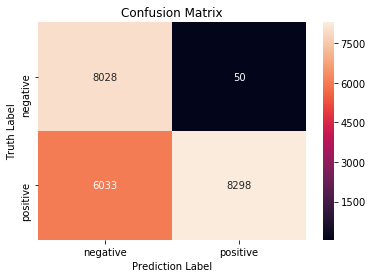

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(Y_test, y_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_log, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [153]:
feature_importances = pd.DataFrame(randforest.feature_importances_,
                                   index = X_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Ts_Test_Area_4,1.847500e-01
Ts_Test_Area_6,8.706320e-02
soft_ver_count,7.706388e-02
Scope_HU,5.352556e-02
Scope_CZ,4.869174e-02
Scope_IE,4.699882e-02
Ts_Coverage_6,4.107215e-02
Ts_Test_Area_5,3.880158e-02
Ts_Coverage_7,3.767832e-02
Ts_Suggested_Severity,3.728809e-02


# Optimization

In [154]:
def join_rows(df) :
    new_df = pd.DataFrame(index=range(1),columns = df.columns)
    for i in range(df.shape[1]) :                       
        temp = set()
        for j in range(df.shape[0]) :
            if j == 0:
                new_df.iloc[j,i] = df.iloc[j,i]
            else :
                if df.iloc[j,i] != new_df.iloc[0,i] :
                    temp.add(str(df.iloc[j,i]))
        if (len(temp) > 0) :
            temp.add(str(new_df.iloc[0,i]))
            if 'nan' in temp :
                temp.remove('nan')
            new_df.iloc[0,i] = ', '.join(temp)
    return new_df

In [166]:
test = pd.read_excel('master2_old_RE_above.xlsx')
test['is_predicted'] = y_pred
#test['Reason to select'] = ''
test.loc[test['is_predicted']==1,'Reason to select'] = 'model prediction'
test.loc[test['is_predicted']==0,'Reason to select'] = 'NA'

In [167]:
frame =  test[test['is_predicted']==1]
frame.shape
# (234, 40)

(8348, 40)

In [168]:
group = frame.groupby(['Ts_Name'])
final = pd.DataFrame()
final = final.append(group.apply(join_rows))

#final.to_excel('test_with_predictions.xlsx',index=False)

In [169]:
final.shape
# (224, 40)

(140, 40)

In [170]:
rule = pd.read_excel('FinalTestSuite_nonOptimized_MR.xlsx')  #142  224
rule['is_predicted'] = 1
rule['is_selected'] = 1

In [171]:
#test1 = pd.merge(test,rule,how='outer',on=['Ts_Name'])

test2 = frame.append(rule)
test2.shape
#test2.to_excel('test_rules_without_join_rows.xlsx',index=False)
# (375, 44)

(8702, 43)

In [172]:
group = test2.groupby(['Ts_Name'])
final = pd.DataFrame()
final = final.append(group.apply(join_rows))
final.shape

# (305, 44)

(362, 43)

In [173]:
final['fail_ratio'].fillna(0,inplace=True)
final['fail_ratio'].replace({'':0},inplace=True)
final['fail_ratio'] = final['fail_ratio'].astype(float)
final['fail_ratio'].dtypes

dtype('float64')

In [174]:
final.to_excel('test_rules_join_rows.xlsx',index=False)

## Criteria One for optimazation ( release note specific )

In [175]:
#final = pd.read_excel('test_rules_join_rows.xlsx')
final_optimization_1 = final[((final['Rn_Status'] != 'Passed') & (final['Reason to select'].str.contains('Change in version/status of test area')))  |
             (final['Reason to select'].str.contains('linked TC for defect id:'))]
#final.to_excel('df.xlsx',index=False)
final.shape
final_optimization_1.shape
# (12, 44)

(362, 43)

(81, 43)

## Criteria Two for optimazation 

In [177]:
final.shape
final_optimization_2 = final[(((final['Cy_Terminal_Name'].str.contains('Hima')) ) & (final['input_terminal'] == 'Hima') 
               & (final['Ts_Suggested_Severity'] == '1a - Fatal') &
                (final['Reason to select'].str.contains('Change in version/status of test area')))  |
                
              (((final['Ts_Suggested_Severity'] == '1a - Fatal') ) & 
               (final['Reason to select'].str.contains('model prediction'))) |
              (final['Reason to select'].str.contains('linked TC for defect id:')) | 
               ( final['Rn_Status'].str.contains('Failed')) ]
final_optimization_2.shape
#Cy_Terminal_Name Reason to select  input_terminal

(362, 43)

(161, 43)